# Imports

In [1]:
from library.dataPreprocessLib import *
from library.resultsLib import *
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTENC
import os

# Data Preprocessing

## Feature Selection and Loading Data

In [2]:
# name = "prantika_bus_stand"
# name = "junction_mall"
# name = "54ft_road"
# name = "dvc_more"
name = "station"

In [3]:
parent_dir = r"../data/54ft/"
train_df_name = r"54ft_train.csv"
test_df_name = f"{name}_test_split.csv"

In [4]:
poi_column = 'Is_Congestion'
output_result_filename = f"{poi_column}_test_result_{name}_zone.csv"

In [5]:
feature_names=['time_zone','stay_duration','wifi_count', 'edge_wifi_count', 'honk_duration',\
               'edge_honk_duration', 'd_wifi_count','d_edge_wifi_count','d_honk_duration',\
               'd_edge_honk_duration', 'human_made','natural_land','road_exist_percent',\
               'highly_populated_poi_exist', 'RSI']

categorical_features=[0,13]

### Training Data

In [6]:
train_csv_df = pd.read_csv(os.path.join(parent_dir, train_df_name))
train_df = get_processed_df(train_csv_df)
train_df.head()

,time_zone,stay_duration,wifi_count,edge_wifi_count,honk_duration,edge_honk_duration,d_wifi_count,d_edge_wifi_count,d_honk_duration,d_edge_honk_duration,human_made,natural_land,road_exist_percent,highly_populated_poi_exist,RSI,Is_Bus_stop,Is_Turn,Is_Signal,Is_Congestion,Is_Adhoc
0,Afternoon,6,0,0.000000,0.0,0.000000,0,0.000000,0.0,0.000000,0.111232,0.636805,0.251963,No,0.000000,Not Bus_stop,Not Turn,Not Signal,Not Congestion,Adhoc
1,Afternoon,10,3,0.015468,1.0,0.015468,3,0.015468,1.0,0.015468,0.124869,0.666587,0.208544,No,2.715045,Bus_stop,Not Turn,Not Signal,Not Congestion,Not Adhoc
2,Afternoon,130,2,0.027800,5.0,0.000000,4,0.018533,5.0,0.000000,0.100360,0.743668,0.155972,No,2.422751,Bus_stop,Turn,Not Signal,Not Congestion,Not Adhoc
3,Afternoon,13,0,0.000000,2.0,0.000000,0,0.000000,2.0,0.000000,0.100911,0.730013,0.169076,No,3.040420,Not Bus_stop,Not Turn,Not Signal,Not Congestion,Adhoc
4,Afternoon,9,0,0.002818,2.0,0.005635,0,0.002818,2.0,0.005635,0.117394,0.487688,0.183064,Yes,1.780860,Bus_stop,Turn,Not Signal,Not Congestion,Not Adhoc


### Testing Data

In [7]:
test_csv_df = pd.read_csv(os.path.join(parent_dir, test_df_name))
test_df = get_processed_df(test_csv_df)
test_df.head()

,time_zone,stay_duration,wifi_count,edge_wifi_count,honk_duration,edge_honk_duration,d_wifi_count,d_edge_wifi_count,d_honk_duration,d_edge_honk_duration,human_made,natural_land,road_exist_percent,highly_populated_poi_exist,RSI,Is_Bus_stop,Is_Turn,Is_Signal,Is_Congestion,Is_Adhoc
0,Morning,105,7,0.000000,69.0,0.000000,7,0.000000,69.0,0.000000,0.122769,0.692291,0.182053,Yes,0.000000,Bus_stop,Turn,Not Signal,Congestion,Not Adhoc
1,Morning,12,2,0.024291,9.0,0.083285,2,0.024291,11.0,0.076344,0.107162,0.766882,0.125955,No,1.289747,Not Bus_stop,Not Turn,Not Signal,Congestion,Not Adhoc
2,Afternoon,95,6,0.000000,4.0,0.000000,6,0.000000,4.0,0.000000,0.160116,0.697338,0.142546,No,32.959722,Bus_stop,Not Turn,Not Signal,Congestion,Not Adhoc
3,Afternoon,102,2,0.012752,23.0,0.261420,4,0.000000,23.0,0.261420,0.112501,0.700820,0.175124,Yes,4.292388,Bus_stop,Turn,Not Signal,Congestion,Not Adhoc
4,Morning,4,0,0.030862,0.0,0.069439,0,0.030862,0.0,0.069439,0.124594,0.730924,0.144481,No,1.737973,Not Bus_stop,Not Turn,Signal,Congestion,Not Adhoc


### Seperating target column and input columns

In [8]:
X = train_df[feature_names].copy()
y = train_df[poi_column].copy()

## Using SMOTE

In [9]:
smote = SMOTENC(categorical_features=categorical_features)
smote

SMOTENC(categorical_features=[0, 13])

In [10]:
X_resampled, y_resampled = smote.fit_sample(X, y)
print(X.shape)
print(y.shape)
print(X_resampled.shape)
print(y_resampled.shape)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
C:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):
C:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:


(2480, 15)
(2480,)
(4492, 15)
(4492,)


## Categorical data Transformation

### For train data

In [11]:
train_array = X_resampled.values
les = [get_label_encoder(train_array[:, feature]) for feature in categorical_features]

In [12]:
encoder = get_one_hot_encoder(train_array, categorical_features)
label_encoder = get_label_encoder(y_resampled)

In [13]:
train_data = transform_categorical_features(train_array, encoder, les, categorical_features, for_train=True)
train_labels = get_labels_for(poi_column, pd.DataFrame(y_resampled), label_encoder)

### For test data

In [14]:
test_array = test_df[feature_names].values

In [15]:
test_data = transform_categorical_features(test_array, encoder, les, categorical_features)
test_labels = get_labels_for(poi_column, test_df, label_encoder)

# Training

In [16]:
model = RandomForestClassifier(n_estimators=20,max_depth=8)
model.fit(train_data, train_labels)
train_predictions = model.predict(train_data) # for training performance stat

# Testing

In [17]:
assert test_data.shape[1] == train_data.shape[1]
test_predictions = model.predict(test_data)

# Performance Stat

## Training Performance

In [18]:
get_performance_stats("train", train_labels, train_predictions)

For train: 
	Accuracy: 0.8993766696349065
	Precision: 0.9019583744669916
	Recall: 0.8993766696349065
	F1 score: 0.899214838488322
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2246
           1       0.93      0.86      0.90      2246

    accuracy                           0.90      4492
   macro avg       0.90      0.90      0.90      4492
weighted avg       0.90      0.90      0.90      4492



## Testing Performance

In [19]:
get_performance_stats("test", test_labels, test_predictions)

For test: 
	Accuracy: 0.5277777777777778
	Precision: 0.8862076362076362
	Recall: 0.5277777777777778
	F1 score: 0.6367521367521367
              precision    recall  f1-score   support

           0       0.95      0.52      0.67        67
           1       0.09      0.60      0.15         5

    accuracy                           0.53        72
   macro avg       0.52      0.56      0.41        72
weighted avg       0.89      0.53      0.64        72



### Confusion Matrix

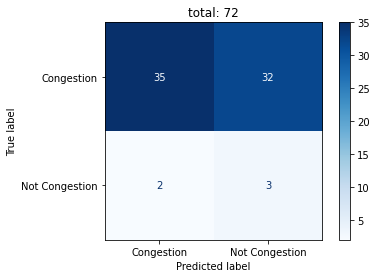

In [20]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
disp = plot_confusion_matrix(model, test_data, test_labels, display_labels=label_encoder.classes_, cmap=plt.cm.Blues)
disp.ax_.set_title(f'total: {len(test_data)}')
plt.show()

### Check & Save Predicitons

In [21]:
result_df = form_result_df(test_csv_df, label_encoder.inverse_transform(test_predictions), poi_column)
result_df.head()

,instance_date,instance_start_time,instance_end_time,Prediction Is_Congestion
0,09/14/2019,12:04:16,12:06:01,Not Congestion
1,09/14/2019,12:06:36,12:06:47,Not Congestion
2,09/14/2019,16:39:20,16:40:54,Congestion
3,09/14/2019,16:45:03,16:46:45,Congestion
4,09/14/2019,11:39:46,11:39:49,Not Congestion


In [22]:
result_df.to_csv(os.path.join(parent_dir, output_result_filename), index=False)

In [23]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [24]:
test_predictions

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0])